In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:

df = pd.read_csv("/content/winequality-red.csv")
columns = df.columns.tolist()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1582 non-null   float64
 1   volatile acidity      1583 non-null   float64
 2   citric acid           1584 non-null   float64
 3   residual sugar        1584 non-null   float64
 4   chlorides             1598 non-null   float64
 5   free sulfur dioxide   1597 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1582 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [63]:
df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,NaN,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,NaN,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
#Number of missing values
df.isna().sum()

fixed acidity           17
volatile acidity        16
citric acid             15
residual sugar          15
chlorides                1
free sulfur dioxide      2
total sulfur dioxide     0
density                  0
pH                       0
sulphates               17
alcohol                  0
quality                  0
dtype: int64

In [65]:
df.shape

(1599, 12)

In [66]:
#1
#Handle missing values
print(df.isna().sum())
data = df.fillna(df.mean())
data.shape

fixed acidity           17
volatile acidity        16
citric acid             15
residual sugar          15
chlorides                1
free sulfur dioxide      2
total sulfur dioxide     0
density                  0
pH                       0
sulphates               17
alcohol                  0
quality                  0
dtype: int64


(1599, 12)

In [76]:
row = df.duplicated()
row

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Length: 1599, dtype: bool

In [67]:
data.isna().sum()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
print(outliers)
df1 = data[~outliers]

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Length: 1599, dtype: bool


In [68]:
#2-----------Data Transformation-------------
def map_quality(quality):
    if quality >= 3 and quality <= 6:
        return 0
    elif quality >= 7 and quality <= 8:
        return 1
    else:
        return None
df1['quality'] = df1['quality'].apply(map_quality)



<ipython-input-68-2eb60bed312e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['quality'] = df1['quality'].apply(map_quality)


Wine quality distribution:
quality
0    1044
1     135
Name: count, dtype: int64


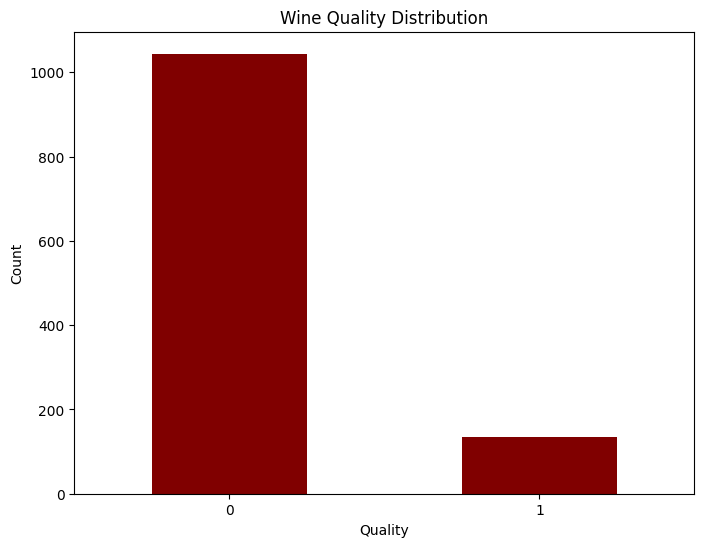

In [69]:
quality_distribution = df1['quality'].value_counts()
print("Wine quality distribution:")
print(quality_distribution)

plt.figure(figsize=(8, 6))
quality_distribution.plot(kind='bar', color='Maroon')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [80]:
#3
objects = list(df1.select_dtypes(include=['object']).columns)
objects
print("there are no categorical columns in the dataset")

there are no categorical columns in the dataset


In [81]:
#4
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

#5
X = df1.drop(columns=['quality'])
y = df1['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

selected_features = X.columns
selected_features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [86]:
#6
from sklearn.metrics import classification_report
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2),"%")
prec = precision_score(y_test, y_pred)
print("Precision:", round(prec*100,2),"%")
recall = recall_score(y_test, y_pred)
print("Recall:", round(recall*100,2),"%")
clf_report = classification_report(y_test, y_pred)
print(clf_report)

Accuracy: 92.8 %
Precision: 66.67 %
Recall: 69.23 %
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       210
           1       0.67      0.69      0.68        26

    accuracy                           0.93       236
   macro avg       0.81      0.82      0.82       236
weighted avg       0.93      0.93      0.93       236

